In [34]:
# Importação

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry

In [62]:
# lendo a base de dados

df = pd.read_csv('../data/processed/salarios.csv')

In [3]:
df.head()

,Unnamed: 0,ano,nivel_experiencia,contrato,cargo,salario,moeda_salario,salario_dolar,residencia,regime_trabalho,local_empresa,tamanho_empresa
0,0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,remoto,US,Médio
1,1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,remoto,US,Médio
2,2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,presencial,AU,Médio
3,3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,presencial,AU,Médio
4,4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,presencial,US,Médio


In [58]:
df.columns

Index(['Unnamed: 0', 'ano', 'nivel_experiencia', 'contrato', 'cargo',
       'salario', 'moeda_salario', 'salario_dolar', 'residencia',
       'regime_trabalho', 'local_empresa', 'tamanho_empresa',
       'residencia_iso3'],
      dtype='object')

In [60]:
df['residencia_iso3'].value_counts()

residencia_iso3
USA    119572
CAN      5238
GBR      3711
AUS       517
NLD       404
        ...  
KWT         1
ASM         1
CHN         1
IRQ         1
JEY         1
Name: count, Length: 101, dtype: int64

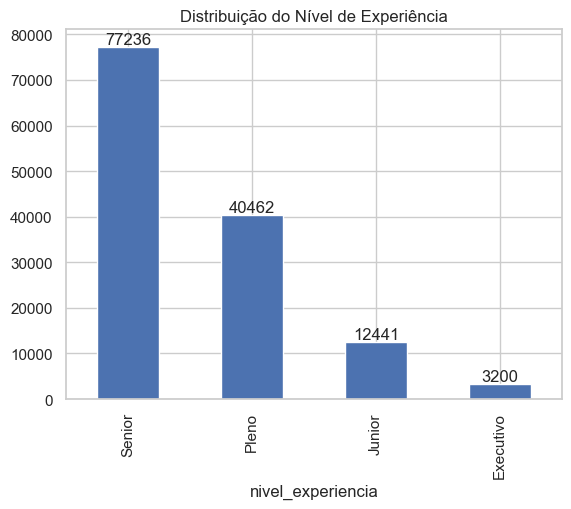

In [13]:
# Plotando com pandas a Distribuição do Nível de Experiência em um gráfico de barras

ax = df['nivel_experiencia'].value_counts().plot(kind='bar', title='Distribuição do Nível de Experiência')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

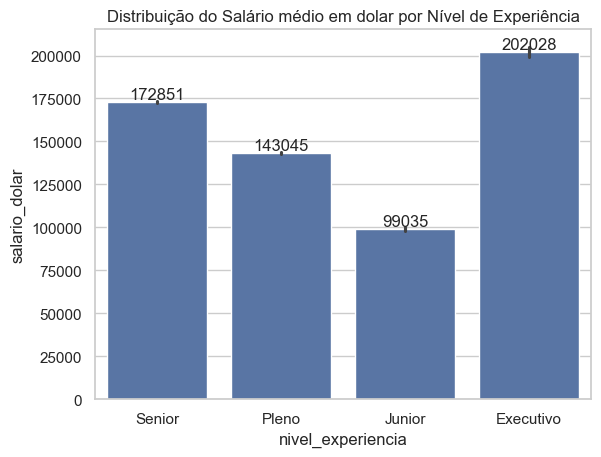

In [16]:
# Plotando com seaborn o salário_dolar por Nível de Experiência em um gráfico de barras

# sns.set(style="whitegrid")
ax = sns.barplot(data=df, x='nivel_experiencia', y='salario_dolar')
ax.set_title('Distribuição do Salário médio em dolar por Nível de Experiência')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

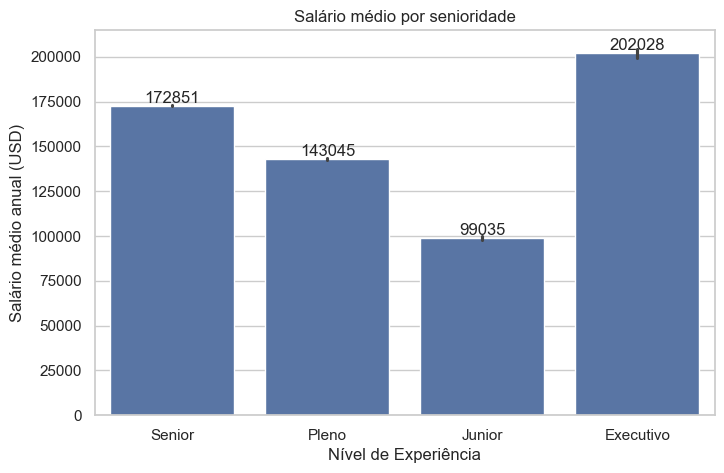

In [15]:
# Personalizando o gráfico de barras do salário_dolar por Nível de Experiência

plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='nivel_experiencia', y='salario_dolar')
plt.title("Salário médio por senioridade")
plt.xlabel("Nível de Experiência")
plt.ylabel("Salário médio anual (USD)")

# explicitando as legendas dos dados
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()

In [22]:
# agrupando a média do salario_dolar por nível_experiencia

df.groupby('nivel_experiencia')['salario_dolar'].mean().sort_values(ascending=False)

nivel_experiencia
Executivo    202027.667813
Senior       172850.838301
Pleno        143044.845979
Junior        99034.963267
Name: salario_dolar, dtype: float64

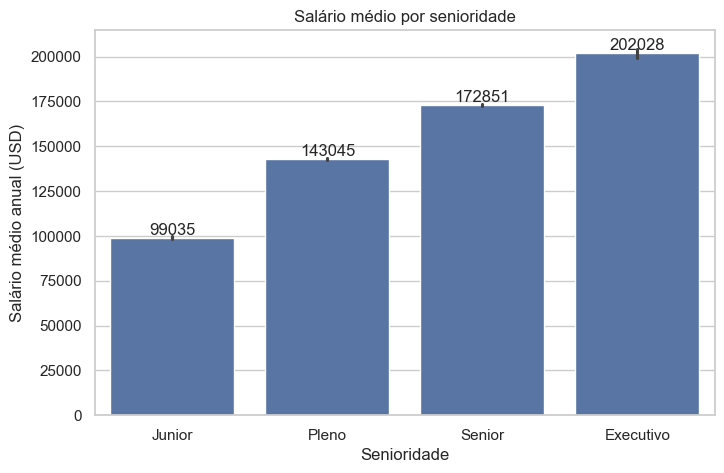

In [21]:
# Plotando o gráfico de barras do salário_dolar por Nível de Experiência ordenado por Nível de Experiência(média)

nivel_ordenado = df.groupby('nivel_experiencia')['salario_dolar'].mean().sort_values(ascending=True).index

plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='nivel_experiencia', y='salario_dolar', order=nivel_ordenado)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")

# explicitando as legendas dos dados
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()

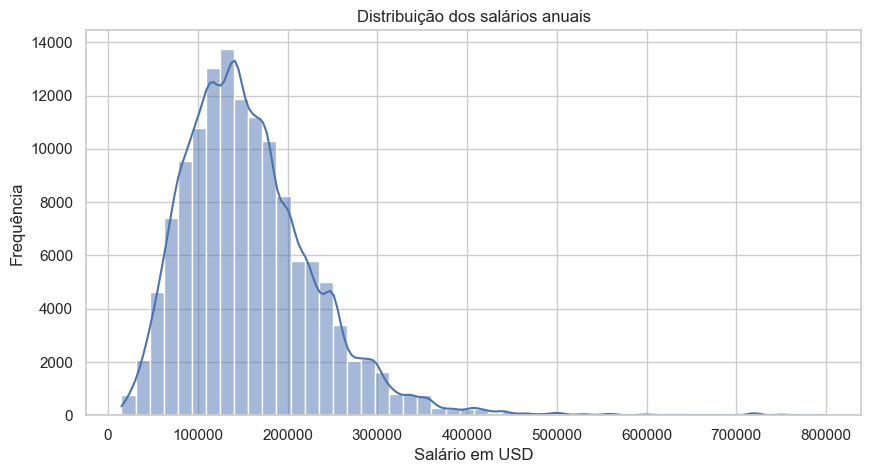

In [24]:
plt.figure(figsize=(10,5))
ax = sns.histplot(df['salario_dolar'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

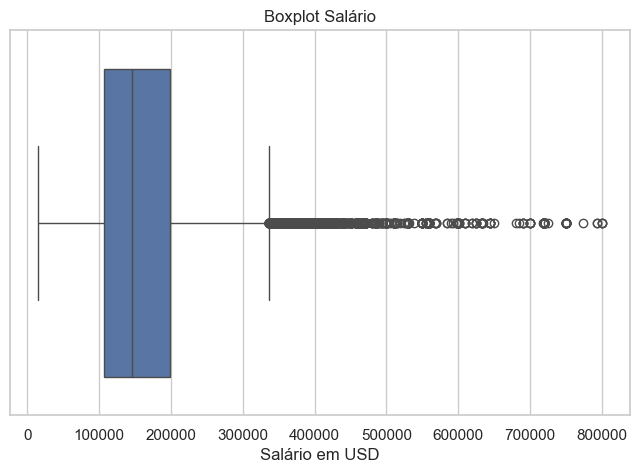

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['salario_dolar'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

In [29]:
df.columns

Index(['Unnamed: 0', 'ano', 'nivel_experiencia', 'contrato', 'cargo',
       'salario', 'moeda_salario', 'salario_dolar', 'residencia',
       'regime_trabalho', 'local_empresa', 'tamanho_empresa'],
      dtype='object')

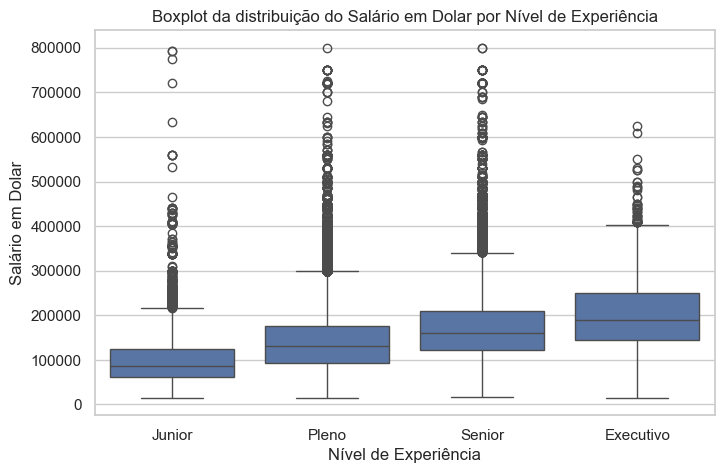

In [37]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_experiencia', y='salario_dolar', data=df, order=ordem_senioridade)
plt.title("Boxplot da distribuição do Salário em Dolar por Nível de Experiência")
plt.xlabel("Nível de Experiência")
plt.ylabel("Salário em Dolar")
plt.show()

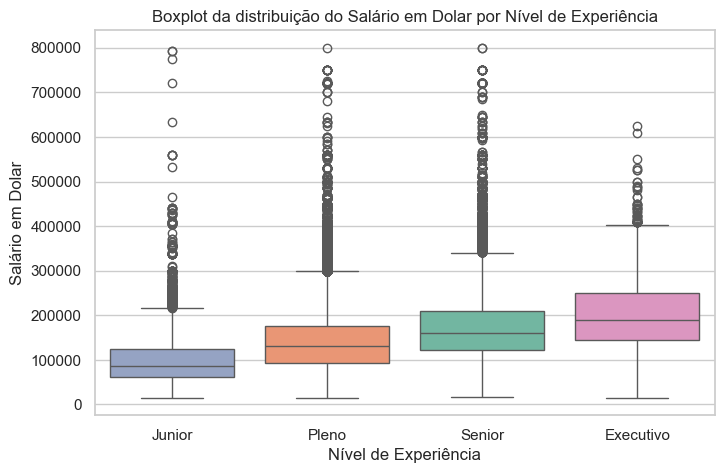

In [38]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='nivel_experiencia', y='salario_dolar', data=df, order=ordem_senioridade, palette='Set2', hue='nivel_experiencia')
plt.title("Boxplot da distribuição do Salário em Dolar por Nível de Experiência")
plt.xlabel("Nível de Experiência")
plt.ylabel("Salário em Dolar")
plt.show()

In [39]:
# gráfico de média salarial por senioridade em barras usando o plotly

ax = df.groupby('nivel_experiencia')['salario_dolar'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(ax,
             x='nivel_experiencia',
             y='salario_dolar',
             title='Média Salarial por Nível de Experiência',
             labels={'nivel_experiencia': 'Nível de Senioridade', 'salario_dolar': 'Média Salarial Anual (USD)'})

fig.show()

In [43]:
remoto_contagem = df['regime_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos regimes de trabalho',
          )

fig.show()

In [42]:
remoto_contagem = df['regime_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos regimes de trabalho',
             hole=0.5
          )

fig.show()

In [45]:
remoto_contagem = df['regime_trabalho'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [47]:
# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df['residencia_iso3'] = df['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df[df['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['salario_dolar'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='salario_dolar',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'salario_dolar': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [61]:
df.to_csv('../data/processed/salarios_final.csv', index=False)